### Cleaning, tidying and re-arranging your data

It is very rare for a dataset to be in the exact format you'd like, with just the data you want and no errors.  Much of the work in data analysis is producing a tidy dataset ready to work with.  80% of data analysis is spent on the process of cleaning and preparing the data (Dasu and Johnson 2003).  In this week's classes you will learn about:  

Adding/removing columns  
Combining columns  
Filtering data - by rows, columns  
Transforming data - operations over series  
Tidy data
Changing form of data - melt, pivot  


In Class 3 you will learn about tidy data and more advanced ways of manipulating data into useful forms.
In Class 4 you'll practise these processes on a dataset of your choice.  

In [1]:
# Analysis modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Introduction - basic changes

Read in one of last week's dataframes  - count.csv in the datassets folder

In [2]:
df = pd.read_csv('../datasets/count.csv')

In [3]:
df

,Field,Sheep,Goats,Barley,Oats
0,Waun_fach,45,44,103,521
1,Ffos_fawr,5,2,233,324
2,Aberheidol,67,23,432,734
3,Hen_cae,8,6,612,123
4,Glynan,23,7,332,243
5,Derwen,4,9,12,734
6,Llanwenant,55,3,4,128
7,Heol-y-bryn,1,11,543,223
8,Lan-y-mor,2,34,723,316
9,Pen-y-garn,67,3,126,402


The index is not doing anything useful here.  We can read in with the field names as the index

In [33]:
df = pd.read_csv('../datasets/count.csv', index_col = 0)
df

,Sheep,Goats,Barley,Oats
Field,,,,
Waun_fach,45,44,103,521
Ffos_fawr,5,2,233,324
Aberheidol,67,23,432,734
Hen_cae,8,6,612,123
Glynan,23,7,332,243
Derwen,4,9,12,734
Llanwenant,55,3,4,128
Heol-y-bryn,1,11,543,223
Lan-y-mor,2,34,723,316


We'll add two new columns - one of Soil types, one of Drainage. Here they are as lists.

In [ ]:
["Sand","Loam","Loam","Clay","Clay","Loam","Sand","Sand","Clay","Clay"]

In [ ]:
["Good", "OK", "Poor", "Poor", "Poor", "Good", "Good", "OK", "OK","Poor"]

Make the new columns from the list like this:  
    
    df["COLUMN_NAME"] = [LIST]
    
Check the columns have been added correclty

In [34]:
df["Soil"] = ["Sand","Loam","Loam","Clay","Clay","Loam","Sand","Sand","Clay","Clay"]
df["Drainage"] = ["Good", "OK", "Poor", "Poor", "Poor", "Good", "Good", "OK", "OK","Poor"]

In [35]:
df

,Sheep,Goats,Barley,Oats,Soil,Drainage
Field,,,,,,
Waun_fach,45,44,103,521,Sand,Good
Ffos_fawr,5,2,233,324,Loam,OK
Aberheidol,67,23,432,734,Loam,Poor
Hen_cae,8,6,612,123,Clay,Poor
Glynan,23,7,332,243,Clay,Poor
Derwen,4,9,12,734,Loam,Good
Llanwenant,55,3,4,128,Sand,Good
Heol-y-bryn,1,11,543,223,Sand,OK
Lan-y-mor,2,34,723,316,Clay,OK


Here's one way to drop a column:  

    df = df.drop(columns=[COLUMN_NAMES])
    
Drop the column of Goats.

In [36]:
df = df.drop(columns=["Goats"])

In [11]:
df

,Sheep,Barley,Oats,Soil,Drainage
Field,,,,,
Waun_fach,45,103,521,Sand,Good
Ffos_fawr,5,233,324,Loam,OK
Aberheidol,67,432,734,Loam,Poor
Hen_cae,8,612,123,Clay,Poor
Glynan,23,332,243,Clay,Poor
Derwen,4,12,734,Loam,Good
Llanwenant,55,4,128,Sand,Good
Heol-y-bryn,1,543,223,Sand,OK
Lan-y-mor,2,723,316,Clay,OK


to drop a row:
    
    df = df.drop(ROW_NUMBER)
    
Drop the data on Heol-y-bryn field

In [37]:
df = df.drop("Heol-y-bryn")


### Rearranging data  
Panads does not care what order your data isin, but sometimes you want particular columns or rows at the right or top.  Here's how to do this.
Make a list of your columns

In [38]:
 cols = df.columns.tolist()

In [39]:
cols

['Sheep', 'Barley', 'Oats', 'Soil', 'Drainage']

re-arrange by hand or by python list handling

In [40]:
cols_new = cols[-1:] + cols[:-1]
cols_new

['Drainage', 'Sheep', 'Barley', 'Oats', 'Soil']

Apply the new list order to the dataframe

In [42]:
df = df[cols_new]

In [43]:
df

,Drainage,Sheep,Barley,Oats,Soil
Field,,,,,
Waun_fach,Good,45,103,521,Sand
Ffos_fawr,OK,5,233,324,Loam
Aberheidol,Poor,67,432,734,Loam
Hen_cae,Poor,8,612,123,Clay
Glynan,Poor,23,332,243,Clay
Derwen,Good,4,12,734,Loam
Llanwenant,Good,55,4,128,Sand
Lan-y-mor,OK,2,723,316,Clay
Pen-y-garn,Poor,67,126,402,Clay


To do the same with rows re-order by the index

In [44]:
fields = df.index.values.tolist()

In [45]:
fields

['Waun_fach',
 'Ffos_fawr',
 'Aberheidol',
 'Hen_cae',
 'Glynan',
 'Derwen',
 'Llanwenant',
 'Lan-y-mor',
 'Pen-y-garn']

Take the last two fields and make them the first two

In [46]:
fields_new = fields[-2:] + fields[:-2]

In [47]:
fields_new

['Lan-y-mor',
 'Pen-y-garn',
 'Waun_fach',
 'Ffos_fawr',
 'Aberheidol',
 'Hen_cae',
 'Glynan',
 'Derwen',
 'Llanwenant']

In [50]:
df3 = df.reindex(fields_new)
df3

,Drainage,Sheep,Barley,Oats,Soil
Field,,,,,
Lan-y-mor,OK,2,723,316,Clay
Pen-y-garn,Poor,67,126,402,Clay
Waun_fach,Good,45,103,521,Sand
Ffos_fawr,OK,5,233,324,Loam
Aberheidol,Poor,67,432,734,Loam
Hen_cae,Poor,8,612,123,Clay
Glynan,Poor,23,332,243,Clay
Derwen,Good,4,12,734,Loam
Llanwenant,Good,55,4,128,Sand


Re-arrange the dataframe to have both rows and columns alphabetically sorted.
use the python list sorting method


### Sorting data

Sorting is easy - just specify column(s) and direction.  

    df.sort_values(by=['col1', col2], ascending=False)

sort by Sheep

sort by Sheep and Oats

sort in descending order by Barley

### Transforming data   
It's very straightforward to make a new column from an existing one.  
You can treat numerical columns like numbers:

    df["More_sheep"] = df["Sheep"]*50   
    df["Per_sheep"] = df["Barley"]/df["Sheep"]  
    df["Stupid"] = df["Field"]*df["Sheep"]  
    
numpy allows you to do fancier opperations

    df["Logged_oats"] = np.log(df["Oats")

and others.....

In [ ]:
Make a column "Cereals" of the counts for Barley and Oats

In [56]:
 #df["Cereals"] = df["Barley"] + df["Oats"]

In [43]:
df

,Field,Sheep,Barley,Oats,Soil,Drainage,Cereals
0,1,45,103,521,Sand,Good,624
1,2,5,233,324,Loam,OK,557
2,3,67,432,734,Loam,Poor,1166
3,4,8,612,123,Clay,Poor,735
4,5,23,332,243,Clay,Poor,575
5,6,4,12,734,Loam,Good,746
6,7,55,4,128,Sand,Good,132
7,8,1,543,223,Sand,OK,766
8,9,2,723,316,Clay,OK,1039
9,10,67,126,402,Clay,Poor,528


And "Half_Cereals" by diving this by two

In [57]:
#df["Half_Cereals"] = df["Cereals"]/2

In [58]:
df

,Field,Sheep,Barley,Oats,Soil,Drainage,Cereals,Half_Cereals
0,Waun_fach,45,103,521,Sand,Good,624,312.0
1,Ffos_fawr,5,233,324,Loam,OK,557,278.5
2,Aberheidol,67,432,734,Loam,Poor,1166,583.0
3,Hen_cae,8,612,123,Clay,Poor,735,367.5
4,Glynan,23,332,243,Clay,Poor,575,287.5
5,Derwen,4,12,734,Loam,Good,746,373.0
6,Llanwenant,55,4,128,Sand,Good,132,66.0
8,Lan-y-mor,2,723,316,Clay,OK,1039,519.5
9,Pen-y-garn,67,126,402,Clay,Poor,528,264.0


Check to see the type of each column now. Use .info()

In [59]:
#df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 9
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Field         9 non-null      object 
 1   Sheep         9 non-null      int64  
 2   Barley        9 non-null      int64  
 3   Oats          9 non-null      int64  
 4   Soil          9 non-null      object 
 5   Drainage      9 non-null      object 
 6   Cereals       9 non-null      int64  
 7   Half_Cereals  9 non-null      float64
dtypes: float64(1), int64(4), object(3)
memory usage: 648.0+ bytes


The new column, product of an opperation is a float.

##### Working with text
You can also opperate on columns of text in string format.  For example:

    df.binomial = str(df.genus) + "_" + str(df.species)

    df.protien = df.gene.str.upper()

Make a new column of Drainage and soil

In [60]:
#df["Field_type"] = df["Drainage"] + "_" + df["Soil"]

In [61]:
df

,Field,Sheep,Barley,Oats,Soil,Drainage,Cereals,Half_Cereals,Field_type
0,Waun_fach,45,103,521,Sand,Good,624,312.0,Good_Sand
1,Ffos_fawr,5,233,324,Loam,OK,557,278.5,OK_Loam
2,Aberheidol,67,432,734,Loam,Poor,1166,583.0,Poor_Loam
3,Hen_cae,8,612,123,Clay,Poor,735,367.5,Poor_Clay
4,Glynan,23,332,243,Clay,Poor,575,287.5,Poor_Clay
5,Derwen,4,12,734,Loam,Good,746,373.0,Good_Loam
6,Llanwenant,55,4,128,Sand,Good,132,66.0,Good_Sand
8,Lan-y-mor,2,723,316,Clay,OK,1039,519.5,OK_Clay
9,Pen-y-garn,67,126,402,Clay,Poor,528,264.0,Poor_Clay


Make another of Drainage and Oats

This fails as we have "Oats" coded as an integer. 

In [24]:
df["Oats"]

0    521
1    324
2    734
3    123
4    243
5    734
6    128
8    316
9    402
Name: Oats, dtype: int64

We could recode 'Oats' in the dataframe as text, 

    df = df.astype({"Oats": string})
    
But that might mess up later work.  Better to simply tell pandas to treat it as an string in the concatenation:

In [62]:
df["Oat_drainage"] = df["Oats"].astype(str) + "_" + df["Drainage"]
df

,Field,Sheep,Barley,Oats,Soil,Drainage,Cereals,Half_Cereals,Field_type,Oat_drainage
0,Waun_fach,45,103,521,Sand,Good,624,312.0,Good_Sand,521_Good
1,Ffos_fawr,5,233,324,Loam,OK,557,278.5,OK_Loam,324_OK
2,Aberheidol,67,432,734,Loam,Poor,1166,583.0,Poor_Loam,734_Poor
3,Hen_cae,8,612,123,Clay,Poor,735,367.5,Poor_Clay,123_Poor
4,Glynan,23,332,243,Clay,Poor,575,287.5,Poor_Clay,243_Poor
5,Derwen,4,12,734,Loam,Good,746,373.0,Good_Loam,734_Good
6,Llanwenant,55,4,128,Sand,Good,132,66.0,Good_Sand,128_Good
8,Lan-y-mor,2,723,316,Clay,OK,1039,519.5,OK_Clay,316_OK
9,Pen-y-garn,67,126,402,Clay,Poor,528,264.0,Poor_Clay,402_Poor


Tidy up by dropping the new columns  Half_Cerales, Field_type and Oat_Drainage

In [64]:
#df = df.drop(columns = ["Half_Cereals", "Field_type", "Oat_drainage"])

### Lambda functions

What if you want to so something a bit fancier?  Lamba functions give you a lot of flexibility.  

 We want to put in a colum showing the profitability of each field based on the yeild of each crop/flock.  
We can define a lamba function and apply it across the dataframe

In [65]:
df = df.assign(Profit=lambda x: (x['Sheep'] *10 +  x['Barley'] *5 +  x['Oats']*3))
df

,Field,Sheep,Barley,Oats,Soil,Drainage,Cereals,Profit
0,Waun_fach,45,103,521,Sand,Good,624,2528
1,Ffos_fawr,5,233,324,Loam,OK,557,2187
2,Aberheidol,67,432,734,Loam,Poor,1166,5032
3,Hen_cae,8,612,123,Clay,Poor,735,3509
4,Glynan,23,332,243,Clay,Poor,575,2619
5,Derwen,4,12,734,Loam,Good,746,2302
6,Llanwenant,55,4,128,Sand,Good,132,954
8,Lan-y-mor,2,723,316,Clay,OK,1039,4583
9,Pen-y-garn,67,126,402,Clay,Poor,528,2506


We can use lamba to make changes in specific rows in a column and not others.  
Maybe fields Lan-y-mor and Ffos_fawr flooded and produced no yeild.   
We can replace their profits with 0.  
axis = 1 specifies the change it to be made along a column.  

In [66]:
df['Profit'] = df.apply(lambda row: 0 if row['Field'] in ("Lan-y-mor", "Ffos_fawr") else row['Profit'], axis = 1)
df

,Field,Sheep,Barley,Oats,Soil,Drainage,Cereals,Profit
0,Waun_fach,45,103,521,Sand,Good,624,2528
1,Ffos_fawr,5,233,324,Loam,OK,557,0
2,Aberheidol,67,432,734,Loam,Poor,1166,5032
3,Hen_cae,8,612,123,Clay,Poor,735,3509
4,Glynan,23,332,243,Clay,Poor,575,2619
5,Derwen,4,12,734,Loam,Good,746,2302
6,Llanwenant,55,4,128,Sand,Good,132,954
8,Lan-y-mor,2,723,316,Clay,OK,1039,0
9,Pen-y-garn,67,126,402,Clay,Poor,528,2506


Replace current Drainage values with "Good" if Barley yield is greater than 500

In [67]:
#df['Drainage'] = df.apply(lambda row: "Good" if row['Barley'] > 500 else row['Drainage'], axis = 1)
df

,Field,Sheep,Barley,Oats,Soil,Drainage,Cereals,Profit
0,Waun_fach,45,103,521,Sand,Good,624,2528
1,Ffos_fawr,5,233,324,Loam,OK,557,0
2,Aberheidol,67,432,734,Loam,Poor,1166,5032
3,Hen_cae,8,612,123,Clay,Good,735,3509
4,Glynan,23,332,243,Clay,Poor,575,2619
5,Derwen,4,12,734,Loam,Good,746,2302
6,Llanwenant,55,4,128,Sand,Good,132,954
8,Lan-y-mor,2,723,316,Clay,Good,1039,0
9,Pen-y-garn,67,126,402,Clay,Poor,528,2506


A useful nugget here is in logging columns.  logging a 0 gives infinity, so it is useful to ignore 0 values when logging.  You can do this this way:

In [42]:
df['log_profit']=df['NAC81'].apply(lambda x: 0 if x ==0 else np.log10(x))

In [43]:
df

,Field,Sheep,Barley,Oats,Soil,Drainage,Logged_oats,Field_type,Oat_drainage,Profit,log_profit
0,Waun_fach,45,103,521,Sand,Good,6.255750,Waun_fach_Sand,521_Good,2528,7.835184
1,Ffos_fawr,5,233,324,Loam,OK,5.780744,Ffos_fawr_Loam,324_OK,0,0.000000
2,Aberheidol,67,432,734,Loam,Poor,6.598509,Aberheidol_Loam,734_Poor,5032,8.523573
3,Hen_cae,8,612,123,Clay,Good,4.812184,Hen_cae_Clay,123_Poor,3509,8.163086
4,Glynan,23,332,243,Clay,Poor,5.493061,Glynan_Clay,243_Poor,2619,7.870548
5,Derwen,4,12,734,Loam,Good,6.598509,Derwen_Loam,734_Good,2302,7.741534
6,Llanwenant,55,4,128,Sand,Good,4.852030,Llanwenant_Sand,128_Good,954,6.860664
8,Lan-y-mor,2,723,316,Clay,Good,5.755742,Lan-y-mor_Clay,316_OK,0,0.000000
9,Pen-y-garn,67,126,402,Clay,Poor,5.996452,Pen-y-garn_Clay,402_Poor,2506,7.826443


You can also define your own function to apply.
For example, 

In [69]:
def which_use(Sheep, Cereals):
    if Sheep > 30:
        return 'Livestock'
    if Cereals > 1000:
        return 'Arable'
    else:
        return 'Mixed'

This takes in two values ("Sheep" and "Cereals"), goes through an if loop, and outputs a new value - "Mixed" or "Arable" or "Livestock"

In [70]:
df['Best_use'] = df.apply(lambda df: which_use(df['Sheep'],df['Cereals']),axis=1)
df

,Field,Sheep,Barley,Oats,Soil,Drainage,Cereals,Profit,Best_use
0,Waun_fach,45,103,521,Sand,Good,624,2528,Livestock
1,Ffos_fawr,5,233,324,Loam,OK,557,0,Mixed
2,Aberheidol,67,432,734,Loam,Poor,1166,5032,Livestock
3,Hen_cae,8,612,123,Clay,Good,735,3509,Mixed
4,Glynan,23,332,243,Clay,Poor,575,2619,Mixed
5,Derwen,4,12,734,Loam,Good,746,2302,Mixed
6,Llanwenant,55,4,128,Sand,Good,132,954,Livestock
8,Lan-y-mor,2,723,316,Clay,Good,1039,0,Arable
9,Pen-y-garn,67,126,402,Clay,Poor,528,2506,Livestock


Make a new column called "By_Sheep" of Profit divided by Sheep for the Mixed use fields  
Base it on the command used to remove profits fromt eh flooded fields.  

In [73]:
#df['By_Sheep'] = df.apply(lambda row: 0 if row['Best_use'] == "Arable" else row['Profit']/row['Sheep'], axis = 1)
df

,Field,Sheep,Barley,Oats,Soil,Drainage,Cereals,Profit,Best_use,By_Sheep
0,Waun_fach,45,103,521,Sand,Good,624,2528,Livestock,56.177778
1,Ffos_fawr,5,233,324,Loam,OK,557,0,Mixed,0.000000
2,Aberheidol,67,432,734,Loam,Poor,1166,5032,Livestock,75.104478
3,Hen_cae,8,612,123,Clay,Good,735,3509,Mixed,438.625000
4,Glynan,23,332,243,Clay,Poor,575,2619,Mixed,113.869565
5,Derwen,4,12,734,Loam,Good,746,2302,Mixed,575.500000
6,Llanwenant,55,4,128,Sand,Good,132,954,Livestock,17.345455
8,Lan-y-mor,2,723,316,Clay,Good,1039,0,Arable,0.000000
9,Pen-y-garn,67,126,402,Clay,Poor,528,2506,Livestock,37.402985


### Subsetting

How do we make a new dataframe of just the Clay Field data?  
We can run over the Soil colum to create a list of "True" and "False" for each row depending on whether the Soil matches to "Clay.  We then use this filter to subset the dataframe

In [74]:
clay_df = df[df["Soil"]=="Clay"]

"==" is python for an exact match

In [75]:
clay_df

,Field,Sheep,Barley,Oats,Soil,Drainage,Cereals,Profit,Best_use,By_Sheep
3,Hen_cae,8,612,123,Clay,Good,735,3509,Mixed,438.625000
4,Glynan,23,332,243,Clay,Poor,575,2619,Mixed,113.869565
8,Lan-y-mor,2,723,316,Clay,Good,1039,0,Arable,0.000000
9,Pen-y-garn,67,126,402,Clay,Poor,528,2506,Livestock,37.402985


We can use any combination or arithmetrical or boolean [true or false] statements  
Make a dataframe of the Fields with more than 10 sheep in

In [76]:
#Many_Ovid = df[df["Sheep"] > 10]
Many_Ovid

,Field,Sheep,Barley,Oats,Soil,Drainage,Cereals,Profit,Best_use,By_Sheep
0,Waun_fach,45,103,521,Sand,Good,624,2528,Livestock,56.177778
2,Aberheidol,67,432,734,Loam,Poor,1166,5032,Livestock,75.104478
4,Glynan,23,332,243,Clay,Poor,575,2619,Mixed,113.869565
6,Llanwenant,55,4,128,Sand,Good,132,954,Livestock,17.345455
9,Pen-y-garn,67,126,402,Clay,Poor,528,2506,Livestock,37.402985


and annother for non-clay soils. 
"!=" is python for is not equal to

In [77]:
#Not_clay = df[df["Soil"] != "Clay"]
Not_clay 

,Field,Sheep,Barley,Oats,Soil,Drainage,Cereals,Profit,Best_use,By_Sheep
0,Waun_fach,45,103,521,Sand,Good,624,2528,Livestock,56.177778
1,Ffos_fawr,5,233,324,Loam,OK,557,0,Mixed,0.000000
2,Aberheidol,67,432,734,Loam,Poor,1166,5032,Livestock,75.104478
5,Derwen,4,12,734,Loam,Good,746,2302,Mixed,575.500000
6,Llanwenant,55,4,128,Sand,Good,132,954,Livestock,17.345455


We can combine filters as either_or or and

In [78]:
Clay_and_Ovid = df[(df["Sheep"] > 10) & (df["Soil"] == "Clay")]
Clay_and_Ovid

,Field,Sheep,Barley,Oats,Soil,Drainage,Cereals,Profit,Best_use,By_Sheep
4,Glynan,23,332,243,Clay,Poor,575,2619,Mixed,113.869565
9,Pen-y-garn,67,126,402,Clay,Poor,528,2506,Livestock,37.402985


In [79]:
Clay_OR_Ovid = df[(df["Sheep"] > 10) | (df["Soil"] == "Clay")]
Clay_OR_Ovid

,Field,Sheep,Barley,Oats,Soil,Drainage,Cereals,Profit,Best_use,By_Sheep
0,Waun_fach,45,103,521,Sand,Good,624,2528,Livestock,56.177778
2,Aberheidol,67,432,734,Loam,Poor,1166,5032,Livestock,75.104478
3,Hen_cae,8,612,123,Clay,Good,735,3509,Mixed,438.625000
4,Glynan,23,332,243,Clay,Poor,575,2619,Mixed,113.869565
6,Llanwenant,55,4,128,Sand,Good,132,954,Livestock,17.345455
8,Lan-y-mor,2,723,316,Clay,Good,1039,0,Arable,0.000000
9,Pen-y-garn,67,126,402,Clay,Poor,528,2506,Livestock,37.402985


We can select by multiple text matches by presenting a list of string to match

In [81]:
Light_soil = df[df["Soil"].isin(["Loam", "Sand"])]
Light_soil

,Field,Sheep,Barley,Oats,Soil,Drainage,Cereals,Profit,Best_use,By_Sheep
0,Waun_fach,45,103,521,Sand,Good,624,2528,Livestock,56.177778
1,Ffos_fawr,5,233,324,Loam,OK,557,0,Mixed,0.000000
2,Aberheidol,67,432,734,Loam,Poor,1166,5032,Livestock,75.104478
5,Derwen,4,12,734,Loam,Good,746,2302,Mixed,575.500000
6,Llanwenant,55,4,128,Sand,Good,132,954,Livestock,17.345455


We can select by partial text matches.  We need to specify that the field contents are to be treated as a string and can then use a whole range of string opperations lies:

    .contains()
    .startswith()
    .endswith()

In [82]:
Random = df[df["Field"].str.contains("y")]
Random

,Field,Sheep,Barley,Oats,Soil,Drainage,Cereals,Profit,Best_use,By_Sheep
4,Glynan,23,332,243,Clay,Poor,575,2619,Mixed,113.869565
8,Lan-y-mor,2,723,316,Clay,Good,1039,0,Arable,0.000000
9,Pen-y-garn,67,126,402,Clay,Poor,528,2506,Livestock,37.402985


Make a dataframe containing cases where the Barley yield is greater than the oat yield

In [83]:
#Better_Barley = df[df["Barley"]>df["Oats"]]

In [84]:
Better_Barley

,Field,Sheep,Barley,Oats,Soil,Drainage,Cereals,Profit,Best_use,By_Sheep
3,Hen_cae,8,612,123,Clay,Good,735,3509,Mixed,438.625000
4,Glynan,23,332,243,Clay,Poor,575,2619,Mixed,113.869565
8,Lan-y-mor,2,723,316,Clay,Good,1039,0,Arable,0.000000


### Transposing

We can easily transpose the whole data set to give a dataframe arranged with columns of individual fields and rows of values.

In [42]:
Fields = df.T 
Fields

,0,1,2,3,4,5,6,7,8,9
Field,1,2,3,4,5,6,7,8,9,10
Sheep,45,5,67,8,23,4,55,1,2,67
Barley,103,233,432,612,332,12,4,543,723,126
Oats,521,324,734,123,243,734,128,223,316,402
Soil,Sand,Loam,Loam,Clay,Clay,Loam,Sand,Sand,Clay,Clay


Let's make the Field number the header. We use iloc to specifiy the row the column names are in (zero indexed), then drop the first row.

In [43]:
Fields.columns = Fields.iloc[0]
Fields = Fields[1:]
Fields

Field,1,2,3,4,5,6,7,8,9,10
Sheep,45,5,67,8,23,4,55,1,2,67
Barley,103,233,432,612,332,12,4,543,723,126
Oats,521,324,734,123,243,734,128,223,316,402
Soil,Sand,Loam,Loam,Clay,Clay,Loam,Sand,Sand,Clay,Clay


Transpose it back again and make Field a column instead of an index (.reset_index())

## Melting, casting, splitting

### Tidy data  
Melting, casting and splitting are your main tools for re-arranging the data into a tidy format.

Here's a typical way you might be presented with some data. This is transcripts per million reads for 6 samples for each of 7 genes.

In [45]:
df = pd.read_csv('../datasets/Infection_TPM.csv')
df

,Gene_ID,Control_Flower,Infected_Flower,Control_leaf,Infected_leaf
0,NLR_1,34,45,20,23
1,NLR_2,1,33,3,56
2,JA_34,3,321,15,543
3,JA_13,5,45,3,22
4,JA_5,21,34,31,67
5,Aux_3,4,72,7,21
6,Aux_4,6,23,2,19


We can easily plot the gene expression levels for a tissue

<AxesSubplot:xlabel='Gene_ID', ylabel='Control_Flower'>

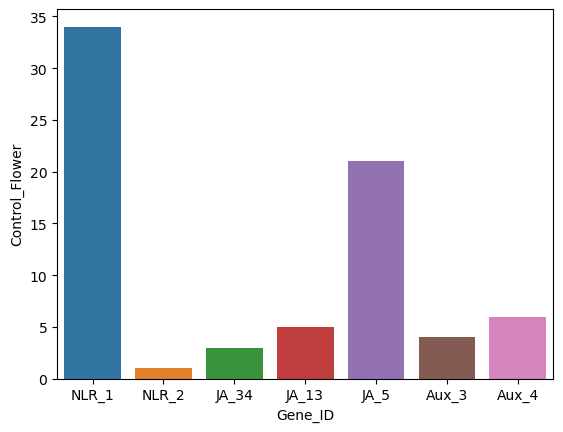

In [11]:
sns.barplot(x="Gene_ID", y="Control_Flower", data=df)

We could instead view the data by gene for each of the 6 samples.  
Transpose the dataframe (.T), 
Make a new column names from the first row  
Drop the first row  
Plot NLR_1 expression by tissue


In [46]:
df2 = df.T
df2.columns = df2.iloc[0]
df2 = df2[1:]

In [22]:
df2

Gene_ID,NLR_1,NLR_2,JA_34,JA_13,JA_5,Aux_3,Aux_4
Control_Flower,34,1,3,5,21,4,6
Infected_Flower,45,33,321,45,34,72,23
Control_leaf,20,3,15,3,31,7,2
Infected_leaf,23,56,543,22,67,21,19


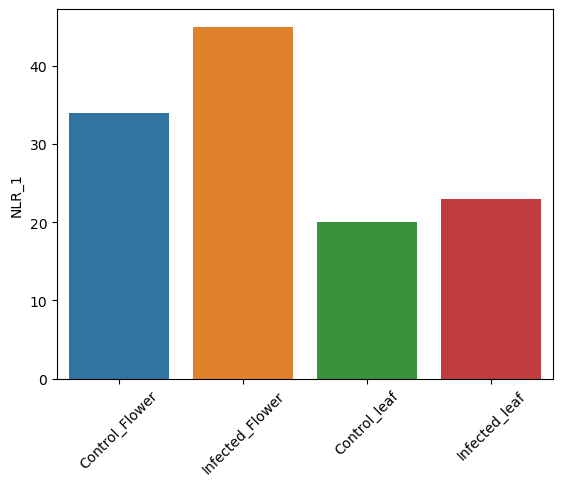

In [23]:
sns.barplot(x=df2.index, y="NLR_1", data=df2)
plt.xticks(rotation=45)
plt.show()

### Splitting 

In [47]:
df2

Gene_ID,NLR_1,NLR_2,JA_34,JA_13,JA_5,Aux_3,Aux_4
Control_Flower,34,1,3,5,21,4,6
Infected_Flower,45,33,321,45,34,72,23
Control_leaf,20,3,15,3,31,7,2
Infected_leaf,23,56,543,22,67,21,19


But what if our focus is on infected and non-infected?  We have to do some juggling to get the dataframe in the right shape to plot useful graphs.  
We need to make columns for Tissue and for Disease state from the index which combines both pieces of information.  We can split the text string on "-" like this:

    df2.index.str.split('_')
    
We make this into two lists by:

    *df2.index.str.split('_').tolist())
    
We can then specify the two new columns:  

    df2['Disease'], df2['Tissue'] = zip(*df2.index.str.split('_').tolist())
    
We need to drop and re-set the index:  

    df2 = df2.reset_index(drop=True)
   

In [48]:
df2['Disease'], df2['Tissue'] = zip(*df2.index.str.split('_').tolist())
df2 = df2.reset_index(drop=True)     

In [49]:
df2

Gene_ID,NLR_1,NLR_2,JA_34,JA_13,JA_5,Aux_3,Aux_4,Disease,Tissue
0,34,1,3,5,21,4,6,Control,Flower
1,45,33,321,45,34,72,23,Infected,Flower
2,20,3,15,3,31,7,2,Control,leaf
3,23,56,543,22,67,21,19,Infected,leaf


In [ ]:
Now plot a barplot of NLR_1 expression by Tissues using hue = "Disease" to show the differences

<AxesSubplot:xlabel='Tissue', ylabel='NLR_1'>

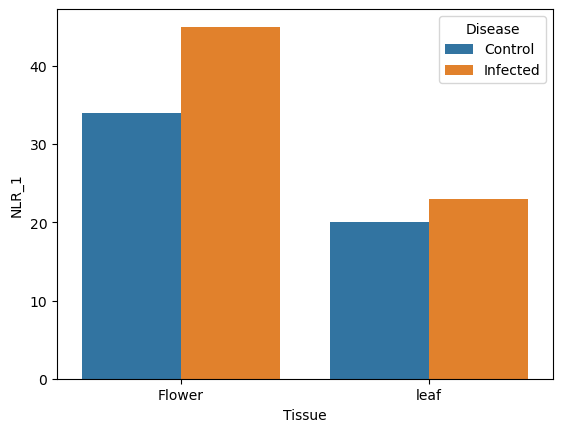

In [27]:
sns.barplot(x="Tissue", y="NLR_1", hue="Disease", data=df2)

### Melting

In [50]:
df2

Gene_ID,NLR_1,NLR_2,JA_34,JA_13,JA_5,Aux_3,Aux_4,Disease,Tissue
0,34,1,3,5,21,4,6,Control,Flower
1,45,33,321,45,34,72,23,Infected,Flower
2,20,3,15,3,31,7,2,Control,leaf
3,23,56,543,22,67,21,19,Infected,leaf


This dataframe has 42 values:  
    
Gene, Disease states, and Tissues are variables  

    Tissues - three possible levels  
    Disease_state - 2 possible levels  
    Genes - 7 possible levels  
    
Samples of plant organs in different disease states are observations  
TPM counts are values 

To make this dataset tidy we need to arrange it with the Genes,  Disease and Tissue as column headers and the TMP values in rows.  Melt will allow as to do this, going form wide format to long format.  

In [ ]:
use pd.melt() on df2.  
The identity variable (id_vars) should be Tissues and Disease
The value variables (value_vars) should be the gene names

The name of the column of variable will be 'Gene_ID'
The name of the column of values will be 'TPM'

Let's get a list of gene names to save having to type them.  Use .tolist() to make a list called names.

In [51]:
#names = df.Gene_ID.tolist()

In [52]:
df3 = pd.melt(df2, id_vars=['Tissue','Disease'], value_vars= names, var_name='Gene_ID', value_name='TPM')
df3

,Tissue,Disease,Gene_ID,TPM
0,Flower,Control,NLR_1,34
1,Flower,Infected,NLR_1,45
2,leaf,Control,NLR_1,20
3,leaf,Infected,NLR_1,23
4,Flower,Control,NLR_2,1
5,Flower,Infected,NLR_2,33
6,leaf,Control,NLR_2,3
7,leaf,Infected,NLR_2,56
8,Flower,Control,JA_34,3
9,Flower,Infected,JA_34,321


Now it's easy to plot the all the data by tissue

<AxesSubplot:xlabel='Tissue', ylabel='TPM'>

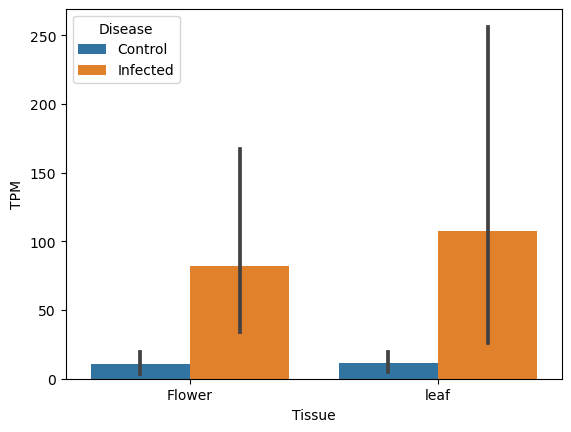

In [53]:
sns.barplot(x="Tissue", y="TPM", hue="Disease", data=df3)

Or break it down by gene

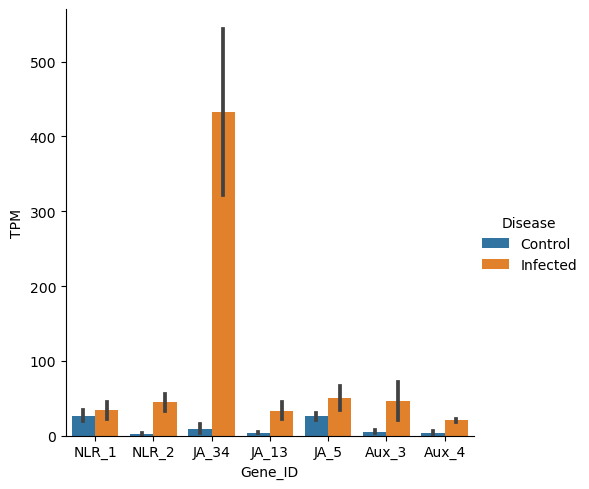

In [54]:
sns.catplot(x="Gene_ID", y="TPM", hue="Disease", data=df3, kind="bar")

or by gene

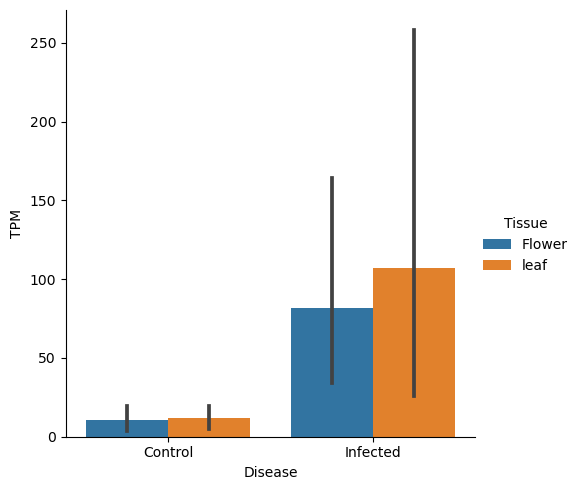

In [34]:
sns.catplot(x="Disease", y="TPM", hue="Tissue", data=df3, kind="bar")

or as individual plots by Organ type

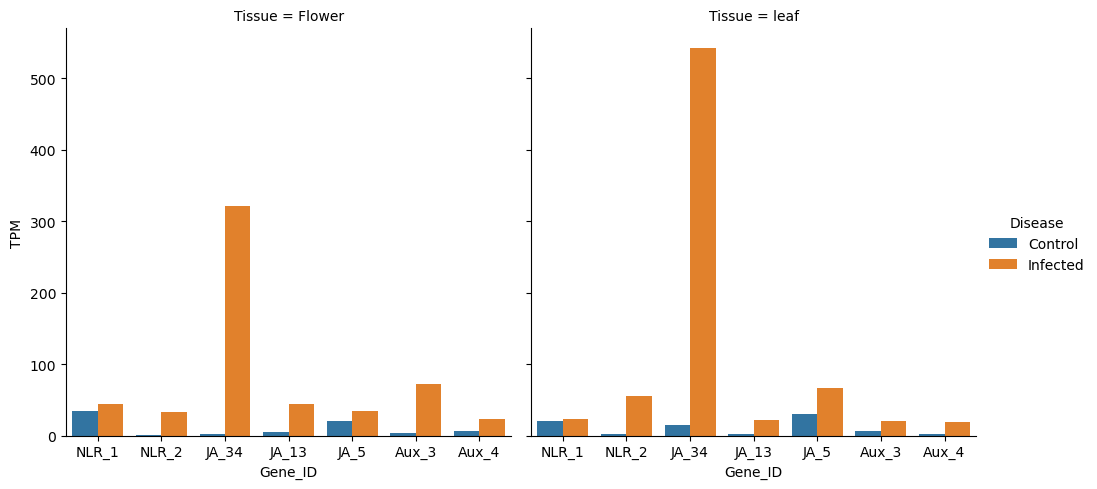

In [35]:
sns.catplot(x="Gene_ID", y="TPM", hue="Disease", data=df3, col='Tissue', kind="bar")

### Casting

Casting is the oppoiste of melting.  Put the dataframe back into wide form using pd.pivot  

index should be ['Disease', 'Tissue']
columns should be 'Gene_ID'
values should be 'TPM'

In [55]:
df4 = pd.pivot(df3, index=['Disease', 'Tissue'], columns='Gene_ID', values='TPM')


In [56]:
df4

Gene_ID         Aux_3 Aux_4 JA_13 JA_34 JA_5 NLR_1 NLR_2
Disease  Tissue                                         
Control  Flower     4     6     5     3   21    34     1
         leaf       7     2     3    15   31    20     3
Infected Flower    72    23    45   321   34    45    33
         leaf      21    19    22   543   67    23    56

Notice we now have a multi-level index.  We will find out more about these in week 5. For the minute we will rest them to columns using  

   df.reset_index()